3.1.4-Challenge-Model Comparison

## Challenge: Model Comparison
You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

## Import, eval and clean data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('countries of the world.csv')
df.shape

(227, 20)

In [3]:
countries = df.dropna(axis=0, how='any')

In [4]:
#change the ',' in the numbers to a '.' for use
countries = countries.drop(['Country', 'Region'], axis=1, )

In [5]:
countries = countries.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',','.'), errors='coerce'))

In [6]:
countries['Country'] = df['Country']
countries['Region']= df['Region']

In [7]:
countries.tail(20)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region
201,64631595,514000,125.7,0.63,0.00,20.48,7400.0,92.6,108.9,29.36,6.46,64.18,2.0,13.87,7.04,0.099,0.441,0.460,Thailand,ASIA (EX. NEAR EAST)
202,5548702,56785,97.7,0.10,0.00,66.61,1500.0,60.9,10.6,46.15,2.21,51.64,2.0,37.01,9.83,0.395,0.204,0.401,Togo,SUB-SAHARAN AFRICA
203,114689,748,153.3,56.02,0.00,12.62,2200.0,98.5,97.7,23.61,43.06,33.33,2.0,25.37,5.28,0.230,0.270,0.500,Tonga,OCEANIA
204,1065842,5128,207.9,7.06,-10.83,24.31,9500.0,98.6,303.5,14.62,9.16,76.22,2.0,12.90,10.57,0.007,0.570,0.423,Trinidad & Tobago,LATIN AMER. & CARIB
205,10175014,163610,62.2,0.70,-0.57,24.77,6900.0,74.2,123.6,17.86,13.74,68.40,3.0,15.52,5.13,0.132,0.318,0.550,Tunisia,NORTHERN AFRICA
206,70413958,780580,90.2,0.92,0.00,41.04,6700.0,86.5,269.5,30.93,3.31,65.76,3.0,16.62,5.97,0.117,0.298,0.585,Turkey,NEAR EAST
207,5042920,488100,10.3,0.00,-0.86,73.08,5800.0,98.0,74.6,3.72,0.14,96.14,1.0,27.61,8.60,0.209,0.380,0.411,Turkmenistan,C.W. OF IND. STATES
210,28195754,236040,119.5,0.00,0.00,67.83,1400.0,69.9,3.6,25.88,10.65,63.47,2.0,47.35,12.24,0.311,0.222,0.469,Uganda,SUB-SAHARAN AFRICA
211,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361,Ukraine,C.W. OF IND. STATES
212,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,1.0,18.96,4.40,0.040,0.585,0.375,United Arab Emirates,NEAR EAST


In [8]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
Population                            179 non-null int64
Area (sq. mi.)                        179 non-null int64
Pop. Density (per sq. mi.)            179 non-null float64
Coastline (coast/area ratio)          179 non-null float64
Net migration                         179 non-null float64
Infant mortality (per 1000 births)    179 non-null float64
GDP ($ per capita)                    179 non-null float64
Literacy (%)                          179 non-null float64
Phones (per 1000)                     179 non-null float64
Arable (%)                            179 non-null float64
Crops (%)                             179 non-null float64
Other (%)                             179 non-null float64
Climate                               179 non-null float64
Birthrate                             179 non-null float64
Deathrate                             179 non-null float64
Agriculture   

                                    Population  Area (sq. mi.)  \
Population                            1.000000        0.610850   
Area (sq. mi.)                        0.610850        1.000000   
Pop. Density (per sq. mi.)           -0.019010       -0.069010   
Coastline (coast/area ratio)         -0.054617       -0.088162   
Net migration                         0.010332        0.052730   
Infant mortality (per 1000 births)    0.002438        0.002924   
GDP ($ per capita)                   -0.033618        0.068356   
Literacy (%)                         -0.038162        0.000682   
Phones (per 1000)                    -0.003942        0.077864   
Arable (%)                            0.206667       -0.053747   
Crops (%)                            -0.062567       -0.160433   
Other (%)                            -0.137345        0.124528   
Climate                              -0.018471       -0.094852   
Birthrate                            -0.064719       -0.037473   
Deathrate 

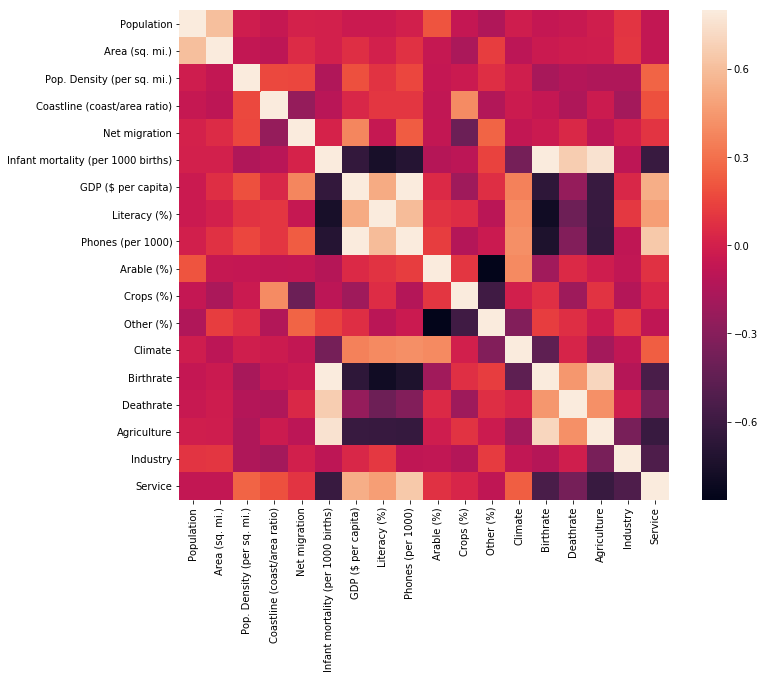

In [9]:
# Make the correlation matrix.
corrmat = countries.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [10]:
#Clean up the column titles for quick acces and itteration
countries.columns = countries.columns.str.strip().str.lower().str.replace('%','').str.replace('(', '').str.replace(')','').str.replace('/', '_').str.replace('\n', '_').str.replace('.', '').str.replace('$', '').str.replace(' ','_')


In [11]:
#countries.columns= countries.columns
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
population                          179 non-null int64
area_sq_mi                          179 non-null int64
pop_density_per_sq_mi               179 non-null float64
coastline_coast_area_ratio          179 non-null float64
net_migration                       179 non-null float64
infant_mortality_per_1000_births    179 non-null float64
gdp__per_capita                     179 non-null float64
literacy_                           179 non-null float64
phones_per_1000                     179 non-null float64
arable_                             179 non-null float64
crops_                              179 non-null float64
other_                              179 non-null float64
climate                             179 non-null float64
birthrate                           179 non-null float64
deathrate                           179 non-null float64
agriculture                         179 non-

## Select Features and Target

In [12]:
features = pd.DataFrame(countries[['pop_density_per_sq_mi', 'net_migration', 'arable_', 'agriculture', 'industry', 'literacy_' ]].dropna())


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 6 columns):
pop_density_per_sq_mi    179 non-null float64
net_migration            179 non-null float64
arable_                  179 non-null float64
agriculture              179 non-null float64
industry                 179 non-null float64
literacy_                179 non-null float64
dtypes: float64(6)
memory usage: 9.8 KB


In [14]:
target = countries['gdp__per_capita']

                       pop_density_per_sq_mi  net_migration   arable_  \
pop_density_per_sq_mi               1.000000       0.161705 -0.059223   
net_migration                       0.161705       1.000000 -0.065846   
arable_                            -0.059223      -0.065846  1.000000   
agriculture                        -0.144315      -0.096617 -0.018610   
industry                           -0.145370      -0.004402 -0.073380   
literacy_                           0.086090      -0.053788  0.086519   

                       agriculture  industry  literacy_  
pop_density_per_sq_mi    -0.144315 -0.145370   0.086090  
net_migration            -0.096617 -0.004402  -0.053788  
arable_                  -0.018610 -0.073380   0.086519  
agriculture               1.000000 -0.352785  -0.620514  
industry                 -0.352785  1.000000   0.105703  
literacy_                -0.620514  0.105703   1.000000  


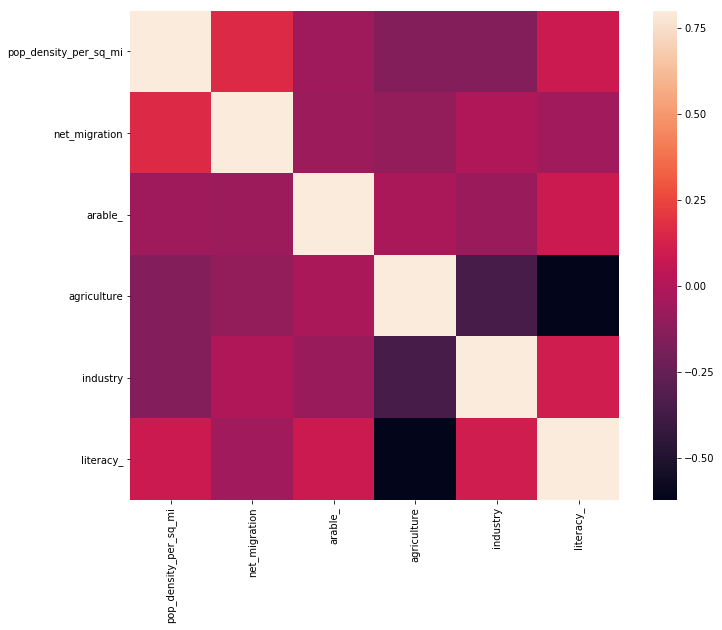

In [15]:
# Make the correlation matrix.
corrmat2 = features.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

In [16]:
features.corr()

,pop_density_per_sq_mi,net_migration,arable_,agriculture,industry,literacy_
pop_density_per_sq_mi,1.000000,0.161705,-0.059223,-0.144315,-0.145370,0.086090
net_migration,0.161705,1.000000,-0.065846,-0.096617,-0.004402,-0.053788
arable_,-0.059223,-0.065846,1.000000,-0.018610,-0.073380,0.086519
agriculture,-0.144315,-0.096617,-0.018610,1.000000,-0.352785,-0.620514
industry,-0.145370,-0.004402,-0.073380,-0.352785,1.000000,0.105703
literacy_,0.086090,-0.053788,0.086519,-0.620514,0.105703,1.000000


## Create KNN Regression

In [17]:
# Build our model.
knn = KNeighborsRegressor(n_neighbors=3)
X = features
Y = target


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [19]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.01719256250765333

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_test, y_test, cv=5)

array([-1.45364916, -0.1788137 , -0.09668675, -2.29060388, -1.52924626])

## Create Linear Regression

In [21]:
from sklearn.metrics import mean_squared_error

# Create training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size = 0.30, random_state=42)

In [22]:
regr = LinearRegression()

regr.fit(X2_train, y2_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2_test, y2_test))


Coefficients: 
 [-1.40395334e-02  6.08830928e+02  9.08593751e+00 -2.53050679e+04
 -9.66543995e+03  1.55519981e+02]

Intercept: 
 2695.4107981071975

R-squared:
0.5627834789805376


## Summary

I picked this set and hoped I could predict GDP with a few features.

It looks like after trying several different features, that it will not be easy to predict as it doesn’t have a high accuracy.

Between the two models the Linear Regression model seems to paint a clearer picture since the data seems linear. K-Nearest Neighbor isn’t great for this data set because the variables are too similar.

All in all, I think we can get a picture of how the features and GDP correlate.